## FAHRİ ULKAT 090220756


## Question 1 

Define the following terms in your own words.

1. The null hypothesis: Hypothesis to be tested called null hypothesis.

2. The alternative hypothesis: The scenario when the null is not satisfied, opposing the null.

3. A test statistic: A calculated value from sample data to decide to reject null or fail to reject null.

4. Type-I error: The situation when we reject the true null hypothesis.

5. Type-II error: The situation when we fail to reject false null hypothesis.

6. Significance level: The threshold probability for rejectin the null, representing the risk of type-I error.

7. The 95% confidence interval: It means 95 times out of 100 times  of chosen statistic will be in this interval. 

8. Heteroskedasticity: A condition where the error variance change across  values of independent variable.

9. The Gauss-Markov theorem: A theorem stating that under certain assumptions OLS estimator are Best Linear Unbiased Estimator (BLUE).

## Question 2

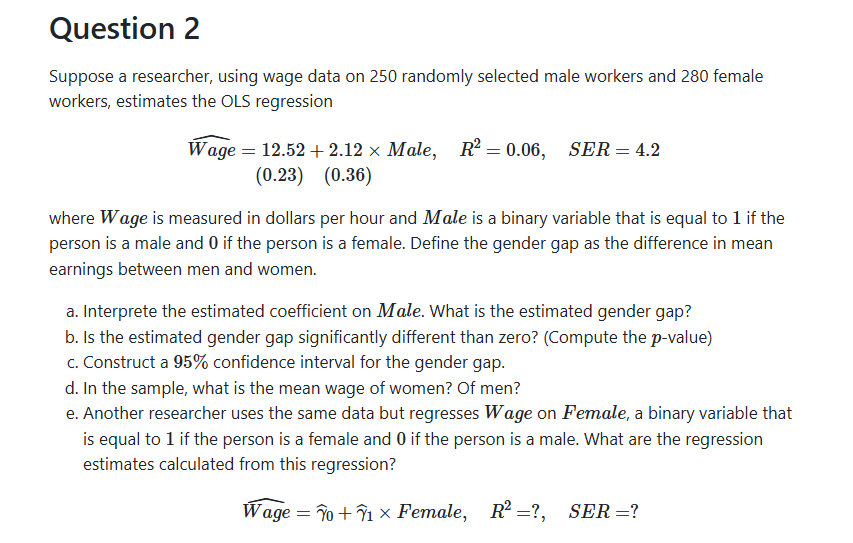

In [2]:
from IPython.display import Image, display

display(Image(filename="C:\\Users\\fahri\\Desktop\\Screenshot_1.png"))



 a. The Coefficient 2.12 means that being male makes your wage higher of 2.12. Estimated gender gap equals the coefficient, so it is 2.12.

In [3]:
import numpy as np
from scipy.stats import norm

#coefs
b0 = 12.52
b1 = 2.12

#standard errors
seb0 = 0.23
seb1 = 0.36


r2 = 0.06
ser = 4.2

#Option B
t_stat = (b1-0)/seb1

print(f"t-stat = {t_stat}")

p_value = 2 * (1 - norm.cdf(abs(t_stat), loc=0, scale=1))

print(f"p-value = {p_value}")



t-stat = 5.888888888888889
p-value = 3.888007249486236e-09


b. Since p-value is much smalle than 0.05 we can reject the null hypothesis

In [4]:
upper_limit = 2.12 + 1.96*0.34
lower_limit = 2.12 - 1.96*0.34

print(f"c. CI: {lower_limit} < gender gap < {upper_limit}")

c. CI: 1.4536000000000002 < gender gap < 2.7864


d. 
1. Mean avarage for women: 12.52 + 2.12 * 0 = 12.52
2. Mean avarage for women: 12.52 + 2.12 * 1 = 14.64

We know that mean wage for men equasl 14.64 so new beta0 will be 14.64 and beinf femala will decerase the mean so new beta1 will be -2.12. Thus,

<li> Wage = 14.64 - 2.12 x Female

<p>
R2 and SER will be same because changind dummy variable does not change relationship between Y and D.</p>

<li> R2 = 0.06 SER = 4.2

### Question 3

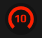

In [5]:
display(Image(filename="C:\\Users\\fahri\\Desktop\\Screenshot_3.png"))


In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import warnings
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as stats


warnings.simplefilter("ignore", UserWarning)

a.

In [7]:
df = pd.read_excel(r"C:\Users\fahri\Desktop\itü\econ\ecn301e\ProblemSet06\ProblemSet6\ProblemSet6\CPSSW8.xlsx")

df.head()

,earnings,gender,age,region,education
0,20.673077,male,31,South,14
1,24.278847,male,50,South,12
2,10.149572,male,36,South,12
3,8.894231,female,33,South,10
4,6.410256,female,56,South,10


In [8]:
model=smf.ols(formula='earnings ~ education',data=df)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:               earnings   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                 1.346e+04
Date:                Sun, 08 Dec 2024   Prob (F-statistic):               0.00
Time:                        23:30:13   Log-Likelihood:            -2.2317e+05
No. Observations:               61395   AIC:                         4.464e+05
Df Residuals:                   61393   BIC:                         4.464e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.3763      0.209    -25.778      0.0

In [9]:
robust_se = model.fit(cov_type = 'HC1')
print(robust_se.summary())

                            OLS Regression Results                            
Dep. Variable:               earnings   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                 1.159e+04
Date:                Sun, 08 Dec 2024   Prob (F-statistic):               0.00
Time:                        23:30:13   Log-Likelihood:            -2.2317e+05
No. Observations:               61395   AIC:                         4.464e+05
Df Residuals:                   61393   BIC:                         4.464e+05
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.3763      0.212    -25.307      0.0

In [10]:
from statsmodels.iolib.summary2 import summary_col

models=['Homoskedastic Model', 'Heteroskedastic Model']
results_table=summary_col(results=[results, robust_results],
                          float_format='%0.3f', 
                          stars=True,
                          model_names=models)
results_table

NameError: name 'robust_results' is not defined

b.

In [ ]:
education_coef = robust_se.params['education']
education_se = robust_se.bse['education']

In [ ]:
t_stat = education_coef / education_se
t_stat 

107.66885682517291

In [ ]:
p_value = 2 * (1 - stats.norm.cdf(abs(t_stat)))  
p_value


0.0

Estimated education effect significantly different than zero because p-value < 0.05

c.

In [ ]:
z_critical = stats.norm.ppf(1 - 0.05)
z_critical 

1.6448536269514722

In [ ]:
error = z_critical * education_se
lower_bound = education_coef - error
upper_bound = education_coef + error
print(f'90% Confidence Interval for the coefficient of education: ({lower_bound}, {upper_bound})')


90% Confidence Interval for the coefficient of education: (1.7184885147645164, 1.7718096869730429)
